In [2]:
import numpy as np 
import pandas as pd 
import os
lista = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        lista.append(os.path.join(dirname,filename))
        

In [3]:
dfs = []
for item in lista:
    df = pd.read_csv(item)
    dfs.append(df)
df = pd.concat(dfs)

In [4]:
df = df[['Year', 'Script Type', 'Rotten Tomatoes  critics','Metacritic  critics', 'Average audience ',
    'Worldwide Gross ($million)','Budget ($million)','Primary Genre']]

In [5]:
print(df.columns)

Index(['Year', 'Script Type', 'Rotten Tomatoes  critics',
       'Metacritic  critics', 'Average audience ',
       'Worldwide Gross ($million)', 'Budget ($million)', 'Primary Genre'],
      dtype='object')


In [6]:
cool = df.columns.get_loc('Script Type')
df['Script Type'] = df['Script Type'].fillna('unknown')
for i in range(len(df)):
    value = df.iloc[i, cool]
    
    if 'original'in value:
        value = 'original'
    elif 'sequel' in value:
        value = 'sequel'
    elif 'true story' in value or 'documentary' in value:
        value = 'real'
    elif 'adaptation' in value:
        value = 'adaptation'
    elif 'remake' in value:
        value = 'remake'
    elif 'prequel' in value:
        value = 'prequel'
    else:
        value = 'unknown'
        
    df.iloc[i, cool] = value
df['Script Type'].unique()

array(['unknown', 'original', 'sequel', 'adaptation', 'real', 'remake',
       'prequel'], dtype=object)

In [7]:
df['Rotten Tomatoes  critics'].unique()

array([0, 96, 69, 32, 75, 57, 92, 68, 39, 84, 85, 82, 81, 88, 53, 63, 80,
       73, 62, 74, 77, 38, 86, 44, 94, 95, 79, 40, 46, 41, 11, 72, 55, 29,
       23, 98, 61, 70, 36, 15, 54, 93, 17, 76, 87, 71, 91, 24, 83, 21, 89,
       64, 35, 50, 42, 18, 60, 14, 51, 66, 97, 78, 45, 19, 25, 47, 48, 67,
       26, 37, 56, 90, 43, 99, 59, 22, 34, 27, 10, 52, 13, 28, 49, 31, 1,
       2, 3, 4, 8, 9, 20, 30, 33, 65, 12, 16, 58, 7, 5, 6, '89', '17',
       '12', '76', '72', '82', '78', '31', '10', '56', '15', '36', '86',
       '91', '67', '8', '45', '53', '83', '62', '77', '37', '41', '49',
       '35', '58', '85', '84', '22', '94', '44', '88', '90', '63', '69',
       '-', '80', '65', '75', '20', '57', '92', '60', '64', '74', '28',
       '18', '48', '54', '33', '68', '93', '34', '87', '100', '71', '23',
       '97', '46', '26', '5', '13', '99', '73', '43', '38', '40', '29',
       '51', '55', '47', '30', '7', '50', '25', '52', '98', '21', '16',
       '9', '95', '61', '6', nan, 100, '39', '0'

In [8]:
coluna = 'Rotten Tomatoes  critics'
df = df[df[coluna] != '-']
df[coluna].dropna(inplace=True)
df[coluna] = pd.to_numeric(df[coluna])
df[coluna].unique()

array([  0.,  96.,  69.,  32.,  75.,  57.,  92.,  68.,  39.,  84.,  85.,
        82.,  81.,  88.,  53.,  63.,  80.,  73.,  62.,  74.,  77.,  38.,
        86.,  44.,  94.,  95.,  79.,  40.,  46.,  41.,  11.,  72.,  55.,
        29.,  23.,  98.,  61.,  70.,  36.,  15.,  54.,  93.,  17.,  76.,
        87.,  71.,  91.,  24.,  83.,  21.,  89.,  64.,  35.,  50.,  42.,
        18.,  60.,  14.,  51.,  66.,  97.,  78.,  45.,  19.,  25.,  47.,
        48.,  67.,  26.,  37.,  56.,  90.,  43.,  99.,  59.,  22.,  34.,
        27.,  10.,  52.,  13.,  28.,  49.,  31.,   1.,   2.,   3.,   4.,
         8.,   9.,  20.,  30.,  33.,  65.,  12.,  16.,  58.,   7.,   5.,
         6., 100.,  nan])

In [9]:
coluna = 'Worldwide Gross ($million)'
col = df.columns.get_loc(coluna)
df = df[df[coluna] != '-']

for i in range(len(df)):
    value = df.iloc[i, col]
    text = str(value)
    text = text.replace(',', '')
    value = float(text)
    df.iloc[i, col] = value

In [10]:
df.isna().sum()

Year                             0
Script Type                      0
Rotten Tomatoes  critics         1
Metacritic  critics              0
Average audience                 1
Worldwide Gross ($million)       0
Budget ($million)                0
Primary Genre                 1686
dtype: int64

In [11]:
coluna = 'Average audience '
df = df[df[coluna] != '-']
df[coluna].dropna(inplace=True)
df[coluna] = pd.to_numeric(df[coluna])
df[coluna].unique()

array([68. , 81. , 72. , 57. , 61. , 73. , 63. , 74. , 66. , 71. , 56. ,
       69. , 77. , 76. , 59. , 80. , 52. , 85. , 84. , 78. , 37. ,  5. ,
       82. , 38. , 86. , 89. , 83. , 70. , 79. , 55. , 75. , 91. , 65. ,
       88. , 49. , 64. , 45. , 62. , 36. , 51. , 41. , 25. , 60. , 47. ,
       48. , 54. , 58. , 87. , 67. , 53. , 46. , 90. , 40. , 39. , 44. ,
       31. , 30. , 42. , 29. , 24. , 50. , 43. , 35. , 90.5, 85.5, 64.5,
       77.5, 74.5, 59.5, 79.5, 55.5, 63.5, 66.5, 48.5, 69.5, 82.5, 73.5,
       58.5, 40.5, 57.5, 41.5, 72.5, 54.5, 47.5, 62.5, 80.5, 65.5, 67.5,
       70.5, 75.5, 32.5, 56.5, 81.5, 71.5, 34. , 33.5, 76.5, 86.5, 15.5,
       52.5, 78.5, 46.5, 18.5, 60.5, 51.5, 43.5, 61.5, 93. , 22. , 28. ,
        nan, 32. , 27. , 33. , 92. , 23. ,  7. , 19. ])

In [12]:
coluna = 'Metacritic  critics'
df = df[df[coluna] != '-']
df[coluna].dropna(inplace=True)
df[coluna] = pd.to_numeric(df[coluna])
df[coluna].unique()

array([ 95,  55,  48,  74,  61,  78,  54,  41,  67,  69,  72,  49,  50,
        66,  56,  52,  60,  63,  64,  75,  81,  62,  47,  40,  32,  38,
        51,  80,  35,  65,  70,  77,  45,  76,  73,  68,  92,  59,  31,
        71,  82,  57,  79,  43,  39,  30,  53,  28,  84,  46,  44,  42,
        58,  91,  83,  17,  96,  24,  25,  36,  26,  19,  37,  89,  11,
        29,  13,  33,  85,  27,  88,  94,  23,  34,  18,  93,  21,  22,
        87,  99,  86,   9,  15,  20,  14,  90,  12, 100,  16,  97])

In [13]:
coluna = 'Primary Genre'
df[coluna] = df[coluna].fillna('unknown')
df[coluna].value_counts()

Primary Genre
unknown      1678
action         64
drama          47
comedy         37
adventure      24
thriller       19
horror         18
crime          12
biography       7
animation       6
romance         6
musical         3
fantasy         3
sci-fi          2
western         1
mystery         1
Name: count, dtype: int64

In [14]:
!pip install matplotlib

Text(0, 0.5, 'Quantidade de Filmes')

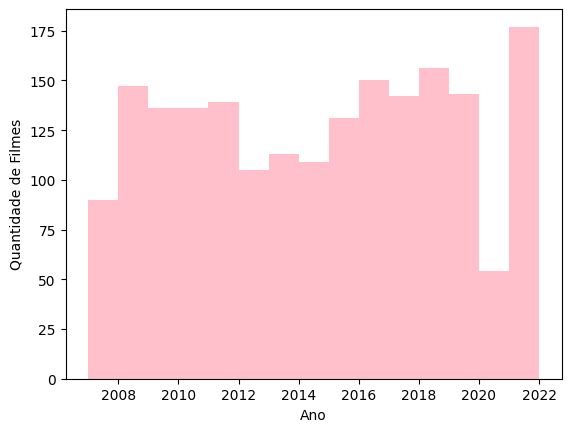

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df['Year'], color='pink', bins = 15)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')

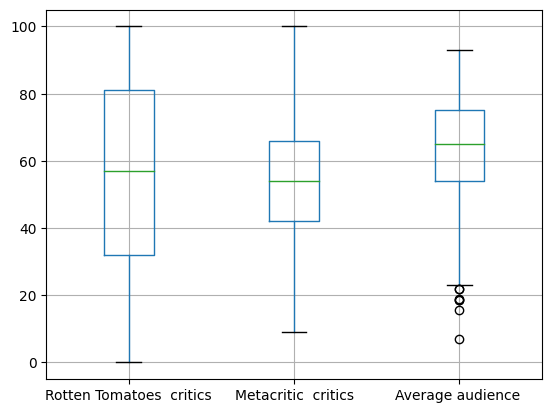

In [16]:
stud = df.boxplot(column = ['Rotten Tomatoes  critics','Metacritic  critics', 'Average audience '])

<Axes: xlabel='Rotten Tomatoes  critics', ylabel='Metacritic  critics'>

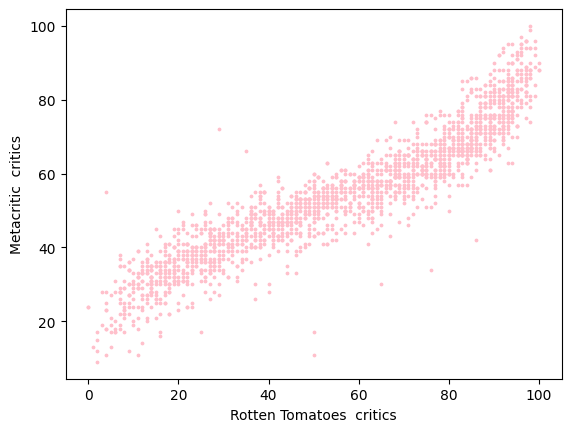

In [17]:
df.plot.scatter(x= 'Rotten Tomatoes  critics', y= 'Metacritic  critics', s=3, color = 'pink') 

<Axes: xlabel='Average audience ', ylabel='Worldwide Gross ($million)'>

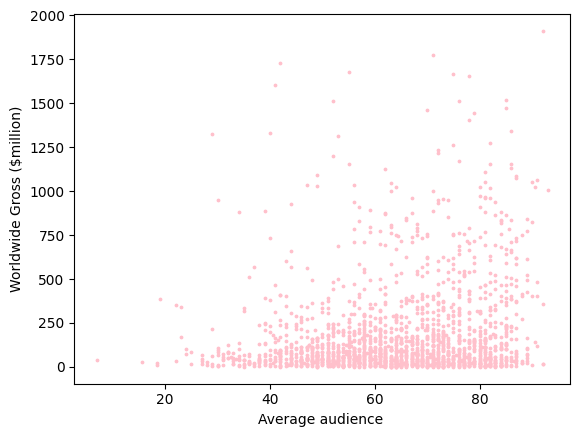

In [18]:
df[df['Worldwide Gross ($million)'] < 2000].plot.scatter(x = 'Average audience ', y='Worldwide Gross ($million)', s=3, color='pink')

In [19]:
df.describe()

,Year,Rotten Tomatoes critics,Metacritic critics,Average audience
count,1928.000000,1927.000000,1928.000000,1927.000000
mean,2014.190871,55.782045,54.600104,63.861702
std,4.379729,27.222197,17.089233,14.516398
min,2007.000000,0.000000,9.000000,7.000000
25%,2010.000000,32.000000,42.000000,54.000000
50%,2014.000000,57.000000,54.000000,65.000000
75%,2018.000000,81.000000,66.000000,75.000000
max,2022.000000,100.000000,100.000000,93.000000
